In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
volume=270.10716172618515
dt=1
A0=1e-5
J=np.load('J.npy')
time=np.arange(J.size)*dt

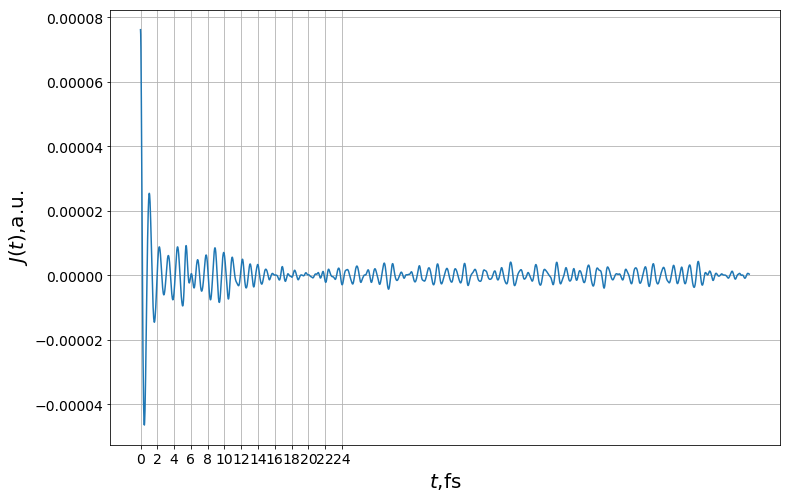

In [78]:
plt.figure(figsize=(12,8))
plt.plot(time/41.341 ,-J)
plt.grid()
plt.xticks(np.arange(0,25,2),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$t$,fs',fontsize=20)
plt.ylabel('$J(t)$,a.u.',fontsize=20)
# plt.savefig('current.png',dpi=600)
J/=volume

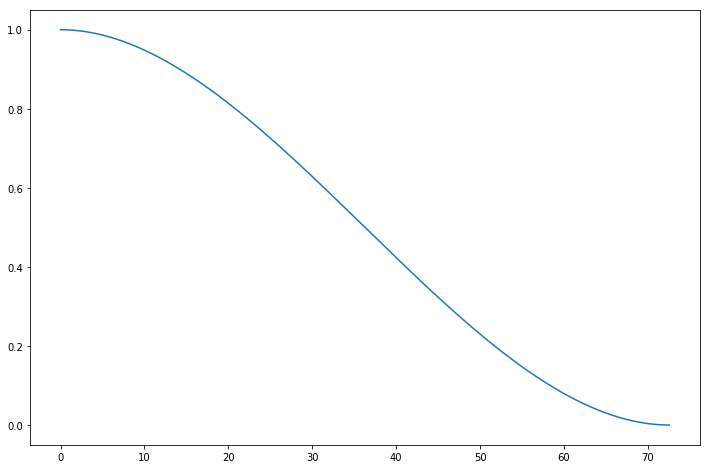

In [79]:
plt.figure(figsize=(12,8))
plt.plot(time/41.341 ,smoothing_t(time,J.size,dt))

In [80]:
def smoothing_t(t,steps,dt):
    return 1.-3.*(t/(steps*dt))**2+2.*(t/(steps*dt))**3

In [81]:

freq = np.fft.fftfreq(J.size, d=dt)
freq=np.sort(freq);freq=freq[np.abs(freq)<10]
sigma=np.zeros(freq.size,dtype=complex)
for w in range(freq.size):
    sigma[w]=np.trapz(J*np.exp(1j*freq[w]*time)*smoothing_t(time,J.size,dt),time)
# A=A0*(np.exp(1j*freq*time.max())-1)/(1j*freq)
sigma=-sigma/A0
epsilon=1+4*np.pi*1j*sigma/freq

/home/drg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [82]:
epsilon.real[int(freq.size/2)]=0
epsilon.imag[int(freq.size/2)]=0

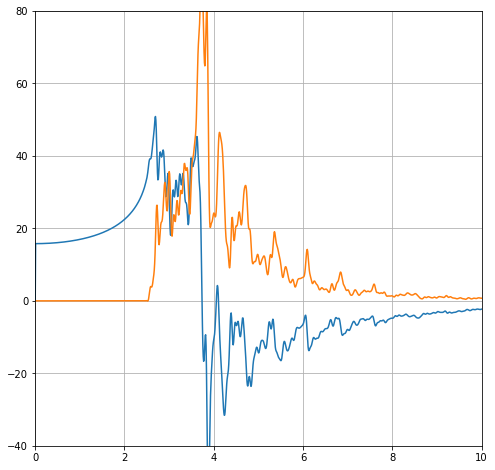

In [83]:
import matplotlib.pyplot as plt
from ase.units import Hartree
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
plt.figure(figsize=(8,8))
plt.plot(freq*Hartree,epsilon.real,label='Re$\epsilon(\omega)$')
plt.plot(freq*Hartree,epsilon.imag,label='Im$\epsilon(\omega)$')


# plt.legend(fontsize=20,loc='best')
# plt.xlabel('$\omega$,eV',fontsize=20)
# plt.ylabel('$\epsilon(\omega)$',fontsize=20)
# plt.xticks(np.arange(-10,11),fontsize=14)
# plt.yticks(np.arange(-100,110,10),fontsize=14)
plt.grid()
plt.xlim([0,10])
plt.ylim([-40,80])
plt.savefig('epsilon_gauss.png',dpi=600)

In [84]:
nvalence=8
f_sum=np.trapz(freq*gaussian_filter1d(epsilon.imag,6)*(freq>0),freq)/(nvalence/volume)/(2*np.pi**2)


In [85]:
f_sum

0.9448519117350174

In [86]:
epsilon.real[int(freq.size/2)+1]

15.784424940956143